In [1]:
# Importando as dependências
from QKDnet.components import Network, Controller
from QKDnet.sim import Simulation
from QKDnet.utils import Logger

# Ativar os logs:
# Logger.activate(Logger)

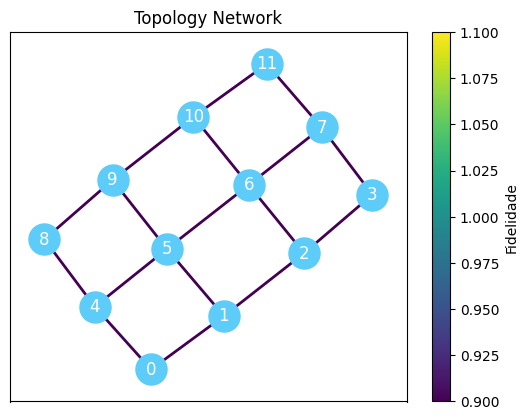

In [2]:
# Rede
rede = Network()
rede.set_topology("Lattice", 3,4)
rede.set_nqubits(100)
rede.draw()
# Controlador
controlador = Controller(rede)

In [3]:
# Parâmetros da simulação
n_requests = 1000
capabilities = [1, 2, 3, 4, 5, 10, 15, 20, 25, 50, 100, 200, 300, 500, 1000]
apps_distribution = [0.33, 0.33, 0.33]
max_time_request = 10
simulation_case = 1

In [4]:
# Ordenador de requests
controlador.set_sorter('shortest')

# Simulações
simulations = []

for c in capabilities:
    sim = Simulation(rede, controlador)
    sim.set_case(simulation_case)
    sim.set_apps_distribution(apps_distribution)
    sim.set_max_time_request(max_time_request)
    sim.set_n_requests(n_requests)
    # Alterando a capacidade
    sim.network.set_capacity(c)
    # Rodando a simulação
    sim.run()
    # Guardando a simulação
    simulations.append(sim)
    

In [5]:
def float_to_string(n):
    # Convertendo o número float para string e dividindo em parte inteira e decimal
    str_number = str(n)
    integer_part, decimal_part = str_number.split('.')
    # Concatenando a parte inteira com a vírgula e a parte decimal
    result_string = f"{integer_part},{decimal_part}" 
    return result_string

In [6]:
for simulation in simulations:
    print(float_to_string(simulation.throughput))

0,011
0,021
0,026
0,0345
0,0422
0,057666666666666665
0,07814285714285714
0,09975
0,125
0,164
0,20745454545454545
0,243
0,2724615384615385
0,2983571428571429
0,3194
